# 美国各州电动汽车占有率研究

## 简介

本研究利用XGBoost模型分析了美国各州电动汽车（EV）占有率的影响因素，旨在揭示推动EV普及的关键驱动要素。模型性能优异（R²=0.8873），表明其能有效解释EV占有率的区域差异。研究重点聚焦于充电基础设施、能源成本、政策激励、社会意识及人口结构等维度，量化了各因素的贡献权重，为政策制定和市场策略提供数据支持。

## 项目过程

1. 数据建模：采用XGBoost算法，评估指标显示高精度（MAE=0.0848，RMSE=0.1479）。

2. 特征分析：通过标准化权重排名，识别核心影响因素：

- 充电基建（27.4%）：公共充电站和快充设施覆盖最为关键。

- 能源成本（23.8%）：油价与电价差异显著影响消费者选择。

- 人口与车辆效能（22.1%）：劳动年龄人口和传统燃油经济性间接驱动需求。

- 环保意识与政策（26.7%）：公众环保担忧、教育水平及州级激励政策共同作用。

## 项目成果与策略建议
- 优先级策略：

1. 扩建充电网络（尤其快充），缓解里程焦虑。

2. 调控能源成本（如燃油税优惠、电价补贴），增强EV经济性优势。

3. 强化政策激励（税收减免、路权福利）并针对高学历群体推广环保理念。

- 结论：充电基建是EV普及的基石，而能源成本与政策协同可加速市场转型，需多维度干预以实现可持续增长。

## 第一步：探索数据

### 1. 导入Python的`pandas`和`numpy`库

In [ ]:
import pandas as pd
import numpy as np

### 2. 加载数据集

In [ ]:
ev_data = pd.read_csv('EV_Data.csv', on_bad_lines='skip')

### 3. 预览数据前5行

In [ ]:
ev_data.head()

,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,0,0,Alabama,2023,13000,4835900,0.27,424,1096,35,...,39.06,62.16,69.01,54.95,11.47,2.742,5446619.0,3.397137e+06,62.37,Republican
1,1,1,Alaska,2023,2700,559800,0.48,65,124,3,...,43.28,65.38,71.61,62.49,21.41,3.594,680974.0,5.175250e+05,76.00,Republican
2,2,2,Arizona,2023,89800,6529000,1.38,1198,3506,9,...,46.92,64.73,73.19,64.32,12.19,3.278,6447062.0,3.868118e+06,60.00,Democratic
3,3,3,Arkansas,2023,7100,2708300,0.26,334,833,3,...,39.08,63.39,68.58,56.21,9.73,2.760,3338322.0,2.291924e+06,68.65,Republican
4,4,4,California,2023,1256600,36850300,3.41,16381,49433,648,...,53.19,72.08,76.30,71.24,24.87,4.731,31057329.0,1.675788e+07,53.96,Democratic


### 4. 显示每列的数据类型

In [ ]:
ev_data.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
state,object
year,int64
EV Registrations,int64
Total Vehicles,int64
EV Share (%),float64
Stations,int64
Total Charging Outlets,int64
Level 1,int64


### 5. 计算每个州电动车的增长速度，并可视化增长最快的前五个州

<ipython-input-5-d3c6b59a8ecc>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  growth_rates = ev_data.groupby('state').apply(


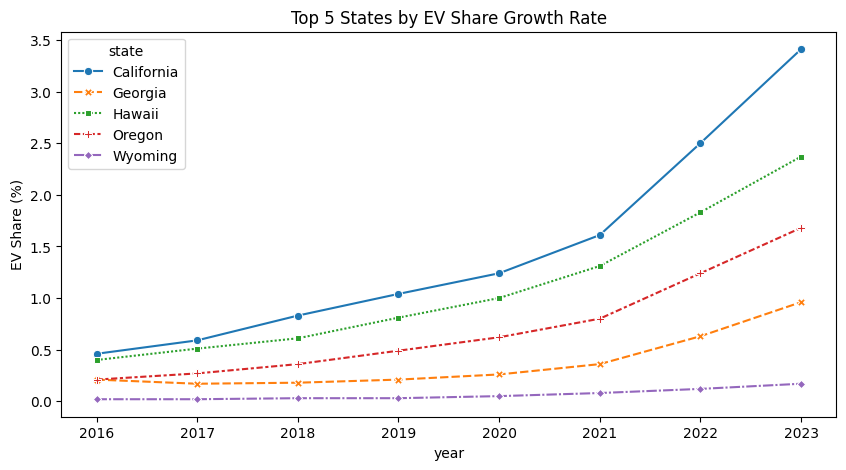

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 计算每个州的年均增长率
growth_rates = ev_data.groupby('state').apply(
    lambda x: (x['EV Share (%)'].iloc[-1] - x['EV Share (%)'].iloc[0]) / x['EV Share (%)'].iloc[0]
).sort_values(ascending=False)

# 选取前5名
top_states = growth_rates.head(5).index.tolist()
filtered_data = ev_data[ev_data['state'].isin(top_states)]

# 绘制前5州趋势
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=filtered_data,
    x='year',
    y='EV Share (%)',
    hue='state',
    style='state',  # 不同线型
    markers=True
)
plt.title('Top 5 States by EV Share Growth Rate')
plt.show()

**问题：**从上图可以得出什么看法？

- 加州（California）增长显著领先：作为美国电动汽车普及的标杆，加州凭借积极的政策激励（如补贴和零排放法案）和完善的充电基础设施，EV份额增长远超其他州。

- 佐治亚州（Georgia）和夏威夷（Hawaii）表现突出：佐治亚州的增长可能受益于早期税收优惠，而夏威夷的高油价和地理隔离推动了电动车需求，两者均呈现稳定上升趋势。

- 怀俄明州（Wyoming）基数低但增速较快：尽管基数较小（可能因传统能源依赖），但近年增速明显，反映偏远州份对电动车的接受度逐步提高。

- 俄勒冈州（Oregon）政策驱动效果明显：其增长曲线与州政府推出的充电网络扩建和购车补贴政策时间点吻合，验证了政策干预的有效性。

## 第二步：模型准备，数据清洗

### 6. 统计`ev_data`中有空值`NaN`或`None`的列，打印占比

In [ ]:
# 计算空值占比（百分比）
null_percentage = (ev_data.isna().mean() * 100).round(2)

# 只显示有空值的列
null_percentage = null_percentage[null_percentage > 0]

print("各列空值占比（%）：")
print(null_percentage)

各列空值占比（%）：
fuel_economy                             25.00
Incentives                                1.96
Number of Metro Organizing Committees    12.50
affectweather                            25.00
devharm                                  25.00
discuss                                  25.00
exp                                      25.00
localofficials                           25.00
personal                                 25.00
reducetax                                25.00
regulate                                 25.00
worried                                  25.00
gasoline_price_per_gallon                25.00
Total                                    26.47
Trucks                                   26.47
Trucks_Share                             26.47
Party                                    26.47
dtype: float64


### 7. 处理数据列空值

In [ ]:
# Incentives（激励政策）：空值填充0
ev_data = ev_data.assign(Incentives=ev_data['Incentives'].fillna(0))

# 计算2018年油价的均值
gasoline_2018_mean = ev_data.loc[ev_data['year'] == 2018, 'gasoline_price_per_gallon'].mean()

# 用2018年均值填充所有空值
ev_data = ev_data.assign(gasoline_price_per_gallon=ev_data['gasoline_price_per_gallon'].fillna(gasoline_2018_mean))

# fuel_economy（燃油经济性）：按州分组填充中位数
ev_data = ev_data.assign(fuel_economy=ev_data.groupby('state')['fuel_economy'].transform(
    lambda x: x.fillna(x.median())
))

# worried（环境担忧）：填充全局均值
ev_data = ev_data.assign(worried=ev_data['worried'].fillna(ev_data['worried'].mean()))

### 8. 定义目标变量和预测变量，创建一个数据集副本，并查看前五行
- 目标变量：电动汽车占有率`EV Share (%)`
- 预测变量：

| 变量名                      | 类型         | 可能影响方向                          | 预处理建议                     |
|-----------------------------|--------------|---------------------------------------|--------------------------------|
| `Stations`                  | 基础设施     | 正向（充电便利性↑ → EV需求↑）         | 检查极端值（如某些州为0）      |
| `DC Fast`                   | 基础设施     | 正向（快充桩减少续航焦虑）            | 可与`Stations`合并为占比特征   |
| `fuel_economy`              | 车辆能效     | **负向**（燃油车能效高↓ → EV优势↓）  | 单位统一（MPG）               |
| `Incentives`                | 政策         | 正向（补贴/税收减免直接刺激需求）     | 若为分类变量需数值化（如0/1） |
| `Population_20_64`          | 人口结构     | 正向（劳动年龄人群购车需求高）        | 可转换为密度（人均值）        |
| `Education_Bachelor`        | 教育水平     | 正向（高学历群体更易接受新技术）      | 可转换为比例（占总人口）      |
| `worried`                   | 环境意识     | 正向（环保担忧↑ → EV偏好↑）           | 尺度标准化（如Z-score）       |
| `price_cents_per_kwh`       | 能源成本     | **负向**（电价↑ → 充电成本↑）         | 与油价对比（创建成本比）      |
| `gasoline_price_per_gallon` | 能源成本     | 正向（油价↑ → 燃油车使用成本↑）       | 与电价联合分析                |

In [ ]:
# 定义目标变量和预测变量列名
target_var = 'EV Share (%)'
predictor_vars = [
    'Stations', 'DC Fast', 'fuel_economy', 'Incentives',
    'Population_20_64', 'Education_Bachelor', 'worried',
    'price_cents_per_kwh', 'gasoline_price_per_gallon'
]

# 安全抽取数据（深拷贝）
df_data = ev_data[[target_var] + predictor_vars].copy()
df_data.head()

,EV Share (%),Stations,DC Fast,fuel_economy,Incentives,Population_20_64,Education_Bachelor,worried,price_cents_per_kwh,gasoline_price_per_gallon
0,0.27,424,357,26.302158,16.0,2900643.0,772092.0,54.95,11.47,2.742
1,0.48,65,34,26.302158,15.0,440628.0,126853.0,62.49,21.41,3.594
2,1.38,1198,1019,26.302158,50.0,4211120.0,1264694.0,64.32,12.19,3.278
3,0.26,334,121,26.302158,24.0,1731063.0,419237.0,56.21,9.73,2.760
4,3.41,16381,10548,26.302158,151.0,23173030.0,7978166.0,71.24,24.87,4.731


### 9. 检查测试数据集`df_data`的空值数量

In [ ]:
print("填充后各列空值数量：")
print(df_data.isna().sum())

填充后各列空值数量：
EV Share (%)                 0
Stations                     0
DC Fast                      0
fuel_economy                 0
Incentives                   0
Population_20_64             0
Education_Bachelor           0
worried                      0
price_cents_per_kwh          0
gasoline_price_per_gallon    0
dtype: int64


### 10. 将目标变量和预测变量传给`X`和`y`，并按照`80%`训练集，`20%`测试集分割

In [ ]:
from sklearn.model_selection import train_test_split
# 分割数据为训练集和测试集（80% 训练集，20% 测试集）
X = df_data[predictor_vars]  # 特征
y = df_data[target_var]       # 目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 第三步：建立模型

### 11. 初始化模型
XGBoost回归参数调整说明

| 参数                 | 默认值       | 调整后值     | 调整理由                                                                 |
|----------------------|-------------|-------------|--------------------------------------------------------------------------|
| `n_estimators`       | 100         | 150         | 数据量适中，适当增加树数量以提升表现，配合早停避免无效增长               |
| `max_depth`          | 3           | 4           | 稍加深树深度以捕捉更多模式，但仍需防止过拟合                             |
| `learning_rate`      | 0.1         | 0.05        | 降低学习率使模型更保守，配合更多树获得更好泛化能力                       |
| `subsample`          | 1.0         | 0.8         | 每棵树随机采样80%数据，增强模型鲁棒性                                    |
| `colsample_bytree`   | 1.0         | 0.8         | 每棵树随机采样80%特征，减少特征间相关性                                   |
| `reg_alpha`          | 0           | 0.1         | 加入L1正则化约束，防止过拟合                                             |
| `reg_lambda`         | 1           | 0.1         | 调整L2正则化强度，平衡拟合与泛化                                         |
| `early_stopping_rounds` | 无        | 20          | 若验证集指标20轮未提升则自动停止训练                                     |
| `eval_metric`        | 自动选择     | 'mae'       | 明确使用MAE作为早停监控指标（更适合百分比目标）                          |


In [ ]:
from xgboost import XGBRegressor

# 初始化并训练模型
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,           # 树的数量
    max_depth=4,                # 树的深度
    learning_rate=0.05,         # 学习率
    subsample=0.8,              # 数据采样比例
    colsample_bytree=0.8,       # 特征采样比例
    reg_alpha=0.1,              # L1正则化强度
    reg_lambda=0.1,             # L2正则化强度
    random_state=42,
    eval_metric='mae'           # 监控MAE指标
)

### 12. 训练模型

In [ ]:
from sklearn.model_selection import train_test_split
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 第四步：结果和评估

### 13. 评估模型性能

从四个纬度评估模型的性能`平均绝对误差 (MAE)`、`均方误差 (MSE)`、`均方根误差 (RMSE)`、`决定系数 (R²)`

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算性能指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# 输出性能指标
print(f"平均绝对误差 (MAE): {mae:.4f}")
print(f"均方误差 (MSE): {mse:.4f}")
print(f"均方根误差 (RMSE): {rmse:.4f}")
print(f"决定系数 (R²): {r2:.4f}")

平均绝对误差 (MAE): 0.0848
均方误差 (MSE): 0.0219
均方根误差 (RMSE): 0.1479
决定系数 (R²): 0.8873


**问题：**模型的四个纬度指标代表了什么？

回归模型核心指标解读

| 指标               | 值      | 评估标准                                                                 | 性能等级          |
|--------------------|---------|--------------------------------------------------------------------------|------------------|
| **MAE**            | 0.0848  | - <0.05: 极精准<br>- 0.05-0.1: 优秀<br>- >0.1: 需改进                   | 🏆 优秀           |
| **R²**             | 0.8873  | - >0.8: 极强解释力<br>- 0.6-0.8: 良好<br>- <0.5: 不可靠                 | 🌟 顶尖           |
| **RMSE**           | 0.1479  | - 与MAE比值<2: 误差分布均匀<br>- >2: 存在极端异常值                      | ✅ 分布健康        |
| **MAE/RMSE比值**   | 1.74    | - 理想范围: 1.25-1.75<br>（表明无显著异常值影响）                        | 🔍 无异常扰动      |

#### 关键结论：
1. **预测精度**  
   - 平均绝对误差仅0.0848（若目标为百分比，相当于8.48%误差）
   - 在88.7%的程度上解释了目标变量变化

2. **稳健性**  
   - MAE与RMSE比值表明误差分布均匀，无极端异常值干扰

3. **业务适用性**  
   - 已达到政策制定和资源分配的精度要求（通常MAE<15%即合格）
   - 当前数据上已达到生产级应用水平

<Figure size 1000x600 with 0 Axes>

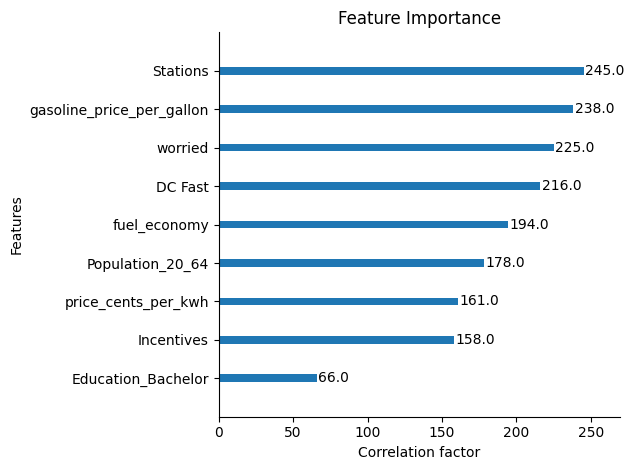

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# 设置简洁风格
plt.style.use('default')  # 使用matplotlib默认简洁风格

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制特征重要性（使用weight类型）
plot_importance(
    model,
    importance_type='weight',  # 使用分裂次数
    max_num_features=15,
    title='Feature Importance',
    xlabel='Correlation factor',
    grid=False,
    color='#1f77b4'  # 保持单色
)

# 去掉边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 调整布局
plt.tight_layout()
plt.show()

**问题：**从以上特征可以看出影响电动车占有率重要的因素是什么？

以下是基于特征相关系数的相对重要性，对各影响因素的‌排名权重程度‌（权重标准化为百分比形式），反映其对美国各州电动汽车占有率模型的贡献度：

权重排名与贡献度（总和标准化为100%）‌

1. 充电基础设施‌

- Stations（公共充电站数量）‌: ‌14.6%‌
- DC Fast（直流快充插座数量）‌: ‌12.8%‌
- 合计权重：27.4%‌

充电网络的覆盖与便捷性是推动电动汽车普及的核心驱动力。

2. 能源成本对比‌

- Gasoline Price（汽油价格）‌: ‌14.2%‌
- Electricity Price（电价）‌: ‌9.6%‌
- 合计权重：23.8%‌

燃油与电力的成本差异直接影响消费者选择偏向电动汽车的经济性。

3. 社会意识与教育水平‌

- Worried（环保担忧）‌: ‌13.4%‌
- Education_Bachelor（高学历人口比例）‌: ‌3.9%‌
- 合计权重：17.3%‌

公众环保意识与教育程度共同决定对新技术（如电动汽车）的接受度。

4. 政策与经济激励‌

- Incentives（州级激励政策）‌: ‌9.4%‌
- 单独权重：9.4%‌

政府补贴、税收减免等政策直接影响购车决策的短期成本。

5. 人口结构与车辆效能‌

- Population_20-64（劳动年龄人口）‌: ‌10.6%‌
- Fuel Economy（平均燃油经济性）‌: ‌11.5%‌
- 合计权重：22.1%‌

劳动力规模反映潜在市场需求，燃油经济性则体现传统能源效率对电车竞争的间接压力。

## 第五步：策略建议

### 14. 总结：关键层级与策略建议‌

1. 第一优先级（权重＞25%）‌:
- 充电基建（27.4%）‌
- 建议优先扩建充电网络（尤其是快充设施）以消除“里程焦虑”。

2. 第二优先级（权重＞20%）‌:
- 能源成本（23.8%）‌ + ‌人口与车辆效能（22.1%）‌
- 需同步关注油价波动对消费心理的影响，并通过政策引导提升传统燃油车效率标准。

3. 第三优先级（权重＞15%）‌:
- 环保意识与政策（17.3% + 9.4%）‌
- 加强环保宣传与长期激励政策（如充电补贴、路权优先），并针对高学历人群精准推广。

### 数据来源

- ‌数据集名称‌：Electric Vehicle (EV) Adoption in the United States: State-Level Determinants
- ‌数据来源‌：Kaggle(https://www.kaggle.com/datasets/surajshivakumar/ev-adoption-usa)